### Importing required library

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Inserting dataset

In [8]:
df = pd.read_csv("data.csv").dropna()[['URLs','Headline', 'Body', 'Label']]

In [38]:
df[338:342]

,URLs,Headline,Body,Label
338,https://www.reuters.com/article/us-usa-energy-...,U.S. heating costs forecast to be higher this ...,reuters most u s households can expect hi...,1
339,http://beforeitsnews.com/sports/2017/09/start-...,Start ‘Em or Sit ‘Em (2017): Week 4: Dak Presc...,start em or sit em week dak prescott ...,0
340,https://www.reuters.com/article/us-brazil-corr...,Brazil police say JBS owners 'profited' from i...,brasilia reuters brazil s police investiga...,1
341,http://money.cnn.com/2017/10/11/media/politica...,Political point scoring muddies sexual-harassm...,at the risk of sounding hopelessly naive it s...,1


In [10]:
df.shape

(3988, 4)

<AxesSubplot:title={'center':'Number of news per category'}, xlabel='Label'>

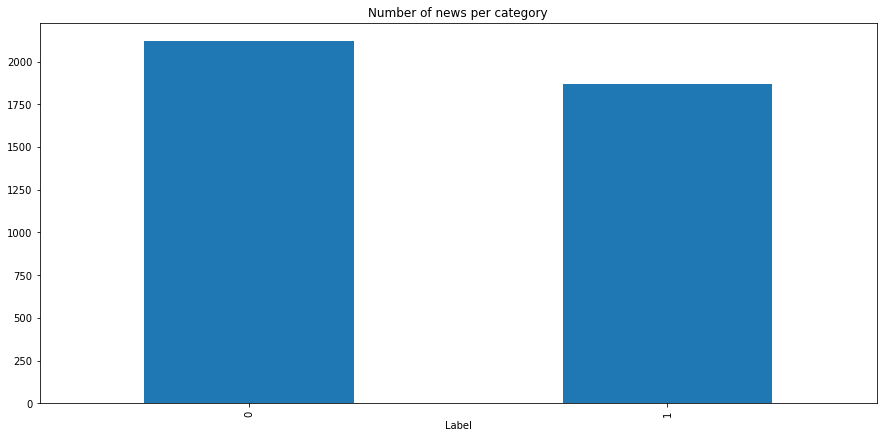

In [13]:
plt.figure(figsize=(15,7))
df.groupby('Label').count()['Headline'].plot.bar(title="Number of news per category")

In [14]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [15]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [16]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
df["Body"] = df["Body"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [19]:
x = df["Body"]
y = df["Label"]

## Splitting the dataset into 75% training set and 25% testing set. 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


#### Convert text to vectors

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
pred_lr=LR.predict(xv_test)

In [26]:
LR.score(xv_test, y_test)

0.9819458375125376

In [27]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       511
           1       0.98      0.99      0.98       486

    accuracy                           0.98       997
   macro avg       0.98      0.98      0.98       997
weighted avg       0.98      0.98      0.98       997



#### Creating Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_train.shape

(2991,)

In [30]:
y_train_predict=LR.predict(xv_train)

In [31]:
LR.score(xv_test, y_test)

0.9819458375125376

In [32]:
confusion_matrix(y_train, y_train_predict)

array([[1584,   25],
       [   7, 1375]])

In [35]:
ca = confusion_matrix(y_train, y_train)

<AxesSubplot:>

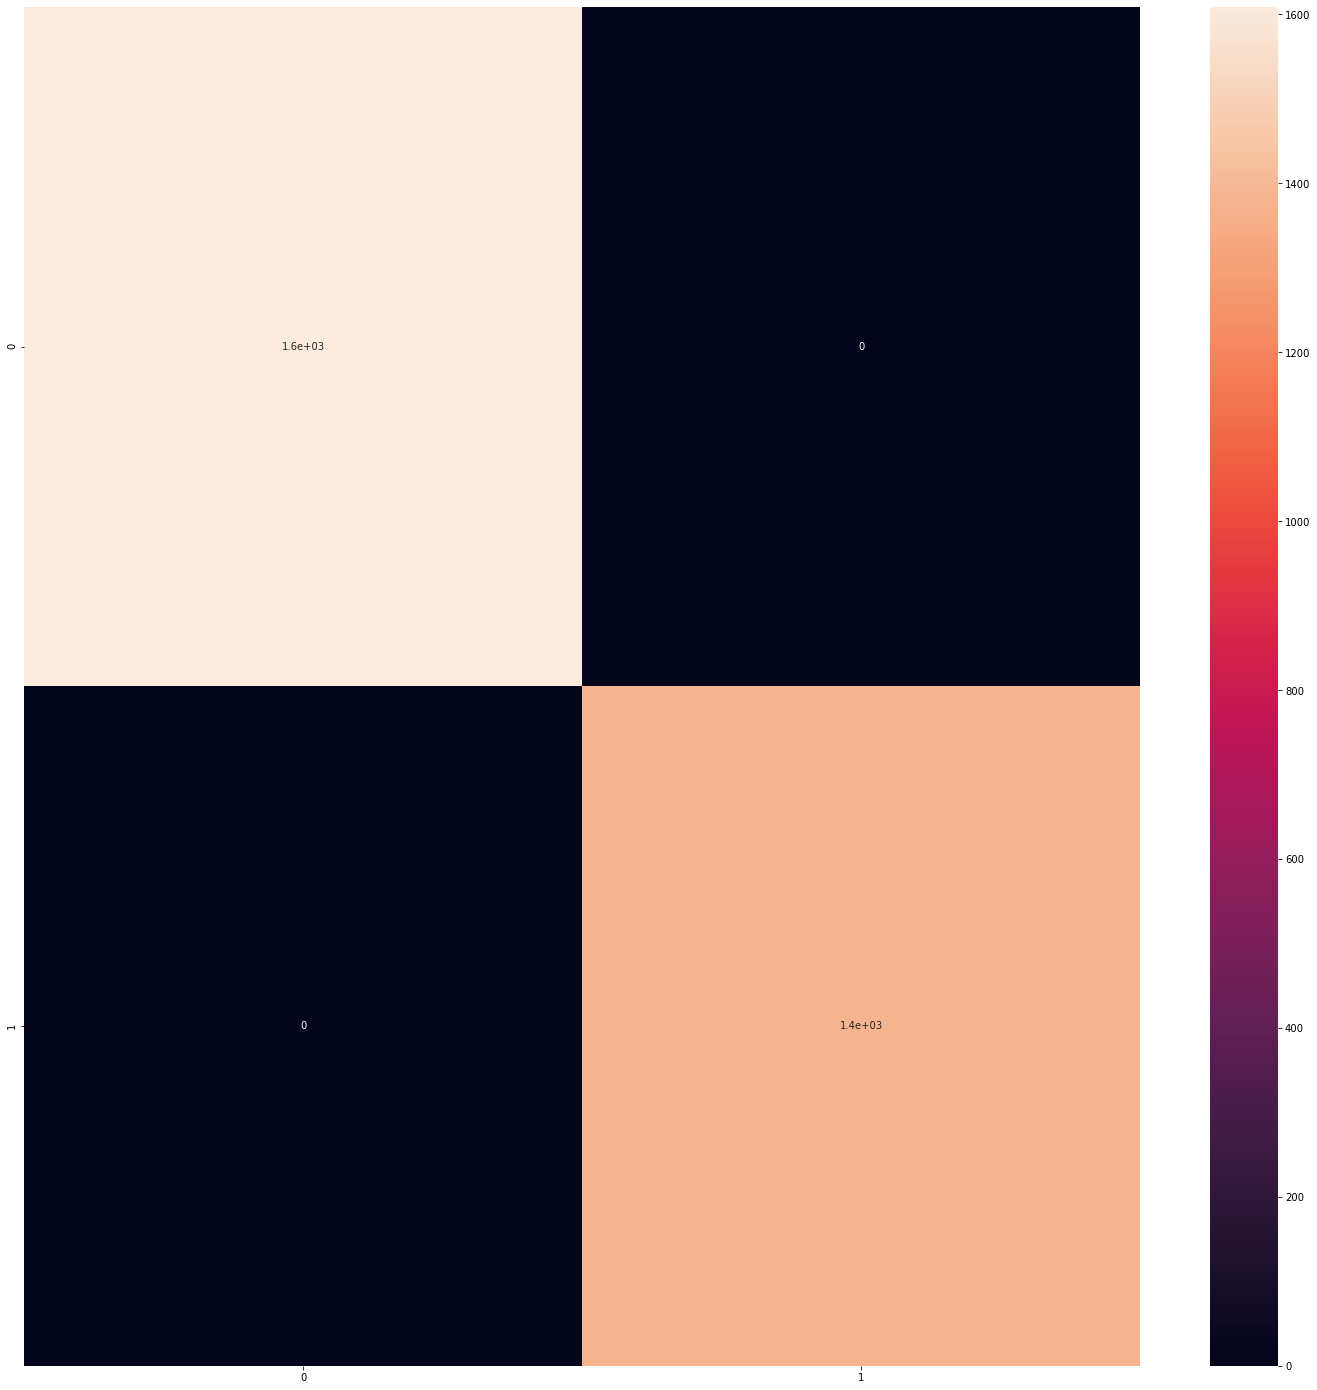

In [37]:

plt.figure(figsize = (25,25))
sns.heatmap(ca, annot=True)


## Splitting the dataset into 85% training set and 15% testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_lr))

In [ ]:
y_train_predict=LR.predict(xv_train)

In [ ]:
confusion_matrix(y_train, y_train_predict)

## Splitting the dataset into 60% training set and 40% testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
print("Accuracy of Model\n",LR.score(xv_test, y_test))
print(classification_report(y_test, pred_lr))
y_train_predict=LR.predict(xv_train)
print("Confusion Matrix\n",confusion_matrix(y_train, y_train_predict))

## Splitting the dataset into 70% training set and 30% testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
print("\nAccuracy of Model:",LR.score(xv_test, y_test),"\n")
print(classification_report(y_test, pred_lr))
y_train_predict=LR.predict(xv_train)
print("Confusion Matrix\n",confusion_matrix(y_train, y_train_predict))

## Splitting the dataset into 90% training set and 10% testing set. 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
print("\nAccuracy of Model:",LR.score(xv_test, y_test),"\n")
print(classification_report(y_test, pred_lr))
y_train_predict=LR.predict(xv_train)
print("Confusion Matrix\n",confusion_matrix(y_train, y_train_predict))

NameError: name 'x' is not defined

In [ ]:
ca = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)